# Testing the trained NN model

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets set up to put all output plots in one output PDF

outputname = 'projectile_classification_test_week3.pdf'

from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages(outputname)


### Prepare the testing dataframe

In [3]:
# First we prepare the testing dataframe

col_names = ['tof','height','distance','velocity','angleDegrees']
cols = [0,1,2,3]

projdf = pd.read_csv('input/projectile_input4_test_20k.txt',sep=' ',index_col=None,usecols=cols,names=col_names)
projdf['highvel'] = projdf.apply(lambda row: 1.0 if row.velocity > 25.0 and row.velocity < 35.0 else 0.0, axis=1)


In [4]:
# Now split into the input vector and the targeted true output
X = projdf[['tof','height','distance']].values
y_true = projdf[['highvel']].values
print(f'Shapes of data, X, y_true are {projdf.shape}, {X.shape} , {y_true.shape}')


Shapes of data, X, y_true are (20000, 5), (20000, 3) , (20000, 1)


## Load the trained model

In [5]:
# Now we load the model we have trained already and its weights
modelname = 'my_model_disc.h5'
mymodel = tf.keras.models.load_model(modelname)
mymodel.load_weights(modelname)


## Predict on the test dataset
 - note that the trained model has never seen this dataset
 - so we are evaluating our trained nn model on an independent dataset   

In [6]:
# Let us now predict based on the model
# Now we evaluate the model on the test and train data by calling the predict function
pred_proba = mymodel.predict(X)

In [7]:
#Put it all together in a dataframe
results = pd.DataFrame()
results['true_y']  = y_true.ravel()
results['pred_y'] = pred_proba


In [8]:
#Get the ROC curve
fpr, tpr, _ = roc_curve(y_true,pred_proba)
auc_score = auc(fpr,tpr)

## Plot the score and ROC Curve

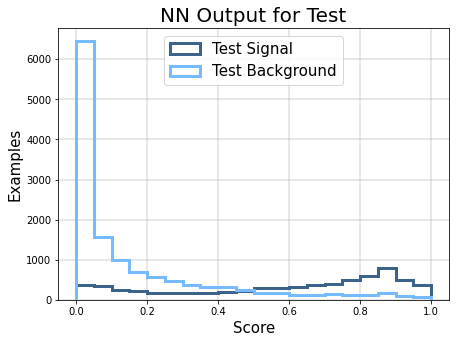

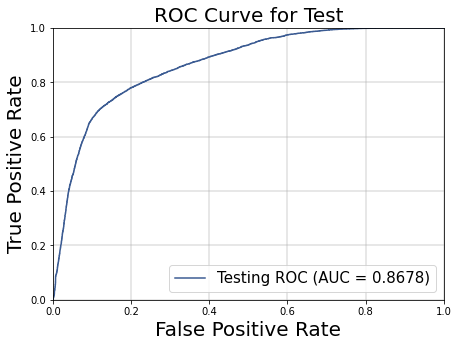

In [9]:
#Plot score, and then the ROC curve


mybins = np.arange(0,1.05,0.05)

plt.figure(figsize=(7,5))
plt.hist(results[results['true_y']==1]['pred_y'],bins=mybins,histtype='step', label="Test Signal", linewidth=3, color='xkcd:denim',density=False,log=False)
plt.hist(results[results['true_y']==0]['pred_y'],bins=mybins,histtype='step', label="Test Background", linewidth=3, color='xkcd:sky blue',density=False,log=False)
plt.legend(loc='upper center',fontsize=15)
plt.xlabel('Score',fontsize=15)
plt.ylabel('Examples',fontsize=15)
plt.title(f'NN Output for Test',fontsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=10)
plt.yticks(fontsize=10)
plt.grid('-',lw=2,alpha=0.3)
#plt.savefig('NNscore.png')
plt.savefig(pp,format='pdf')


plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='xkcd:denim blue', label='Testing ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right',fontsize=15)
plt.title(f'ROC Curve for Test',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlim(0.,1.)
plt.ylim(0.,1.)
plt.grid('-',lw=2,alpha=0.3)
#plt.savefig('ROC.png')
plt.savefig(pp,format='pdf')

In [10]:
print("All done.")
pp.close()

All done.
